# Neural Network Training: Implementing Backpropagation and Model Optimization

In [3]:
import numpy as np
from model import NN, Layer
import matplotlib.pyplot as plt
from pprint import pprint


The goal of this project is to create a neural network with 3 layers: input - hidden - output. Both the input layer and the output layer will have 8 nodes, the hidden layer only 3 nodes(+ biases).

The learning examples will each have 7 zeros and 1 one in them(so there will be only 8 different learning examples, and you will have to repeat the,) and the ouput the network should learn is exactly the same as the input.  So when the input layer is given < 0,0,0,1,0,0,0,0 > as input, the output to aim for is also < 0,0,0,1,0,0,0,0 >.

We train the neural network using **Online Gradient Descent**.

We want our network to learn this reproducing function on the 8 different learning examples. 

Epoch 0 - Loss: 1.8340009566702038
Epoch 1000 - Loss: 0.14839568835543515
Epoch 2000 - Loss: 0.09562468057998016
Epoch 3000 - Loss: 0.06567976140574577
Epoch 4000 - Loss: 0.04628906797208608
Epoch 5000 - Loss: 0.03273676094635895
Epoch 6000 - Loss: 0.024064537419358392
Epoch 7000 - Loss: 0.017928711234643558
Epoch 8000 - Loss: 0.013953332755892233
Epoch 9000 - Loss: 0.011020379195166095


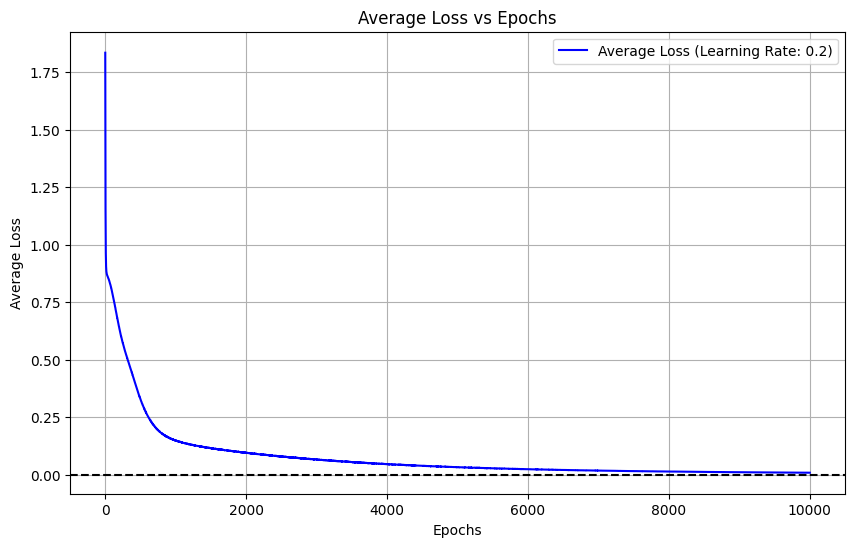

In [5]:
X = np.eye(8)

hidden_layer_size = 3

layers = [
    Layer(8, hidden_layer_size, "sigmoid"),
    Layer(hidden_layer_size, 8, "sigmoid"),
]
nn = NN(layers=layers, lr=0.2)
nn.train(X, 10000)

losses = nn.losses
plt.figure(figsize=(10, 6))
plt.plot(
    losses, label=f"Average Loss (Learning Rate: {nn.learning_rate})", color="blue"
)
plt.title("Average Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.legend()
plt.grid()
plt.axhline(y=0, color="black", linestyle="--")
plt.legend()
plt.show()
plt.show()

In [12]:
for i in range(8):
    print("Input:", X[i])
    print("Output:", np.round(nn.forward(X[i]), 2))
    print()


Input: [1. 0. 0. 0. 0. 0. 0. 0.]
Output: [[0.94 0.   0.   0.   0.03 0.04 0.01 0.  ]]

Input: [0. 1. 0. 0. 0. 0. 0. 0.]
Output: [[0.   0.97 0.01 0.   0.   0.   0.   0.  ]]

Input: [0. 0. 1. 0. 0. 0. 0. 0.]
Output: [[0.   0.02 0.95 0.   0.   0.01 0.02 0.01]]

Input: [0. 0. 0. 1. 0. 0. 0. 0.]
Output: [[0.   0.01 0.   0.96 0.03 0.   0.   0.04]]

Input: [0. 0. 0. 0. 1. 0. 0. 0.]
Output: [[0.01 0.   0.   0.02 0.95 0.   0.   0.  ]]

Input: [0. 0. 0. 0. 0. 1. 0. 0.]
Output: [[0.04 0.   0.   0.   0.   0.85 0.   0.05]]

Input: [0. 0. 0. 0. 0. 0. 1. 0.]
Output: [[0.   0.   0.02 0.   0.   0.   0.97 0.  ]]

Input: [0. 0. 0. 0. 0. 0. 0. 1.]
Output: [[0.   0.   0.01 0.02 0.   0.07 0.   0.86]]



We observe that the neural network, with a learning rate of 0.2, is able to correctly predict the desired output, with very low levels of loss in terms of mean squared error.

## WEIGHTS ANALYSIS

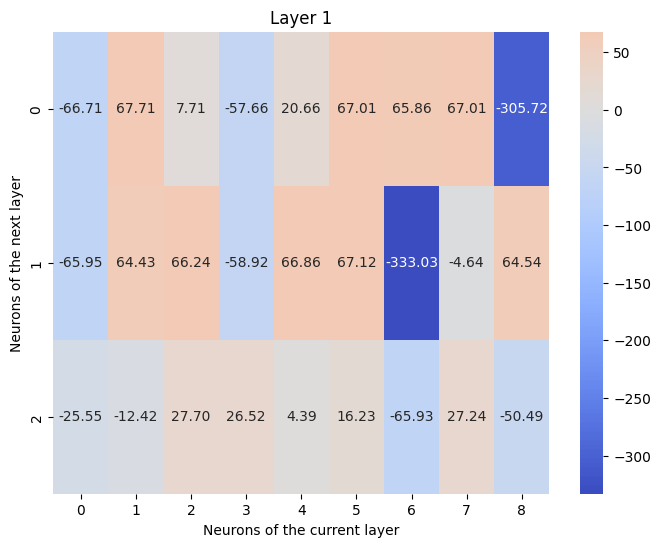

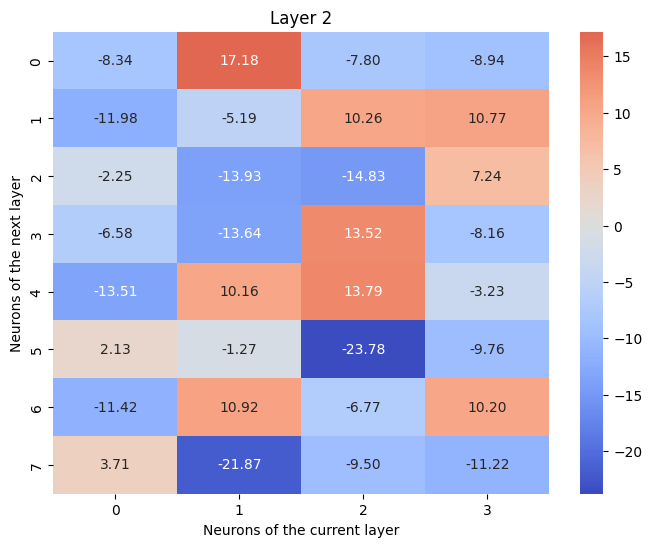

In [ ]:
import seaborn as sns
nn = NN(layers=layers, lr=0.2)

for i in range(len(layers)):
    weights_with_biases = np.concatenate(
        [nn.layers[i].biases, nn.layers[i].weights], axis=0
    )
    plt.figure(figsize=(8, 6))
    sns.heatmap(weights_with_biases.T, cmap="coolwarm", annot=True, fmt=".2f", center=0)
    plt.title("Layer " + str(i + 1))
    plt.xlabel("Neurons of the current layer")
    plt.ylabel("Neurons of the next layer")
    plt.show()

The two heatmaps you provided represent the weight matrices of two different layers in a neural network.

**Layer 1**

The heatmap of Layer 1 has a weight matrix with significant variation in values, as indicated by the color scale. We can see that there are both large positive and large negative weights. For instance, the color scale shows values close to +67 for some weights (indicated in light orange), while others reach as low as −333.03 (dark blue).
The extreme negative values, especially around −305.72 and −333.03, could indicate connections that have a strong inhibitory effect in this layer.

These neurons are thus the ones that have highly influential connections compared to others.

**Layer 2**

Similar to Layer 1, Layer 2 shows a mix of positive and negative weights, though the range of values is less extreme. The highest positive value in this layer is 17.18, while the lowest is approximately −23.78, indicating more moderate weights relative to Layer 1.
The colors are more evenly distributed across this heatmap, suggesting a balanced set of connections without extreme outliers. This could imply a more stable influence of weights in this layer.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


cmap = "viridis"  

plt.figure(figsize=(10, len(layers) * 2))
for layer in nn.layers:
    plt.subplot(len(layers), 1, i + 1)
    sns.heatmap(
        [layer],  # Adding [] to make it 2D for heatmap
        cmap=cmap, 
        annot=True, 
        cbar=True,
        xticklabels=False, 
        yticklabels=[f'Layer {i+1}']
    )
    plt.xlabel("Neuron")
    plt.title(f"Activation Values of Layer {i+1}")

plt.suptitle("Neural Network Activations Heatmap", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 2. Box Plot for Activation Distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=activations, palette="viridis")
plt.xlabel("Layer")
plt.ylabel("Activation Value")
plt.xticks(ticks=range(len(activations)), labels=[f"Layer {i+1}" for i in range(len(activations))])
plt.title("Activation Value Distribution per Layer")
plt.show()
